In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import yfinance as yf

In [36]:
ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2023-01-01"


In [37]:
data = yf.download(ticker, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed


In [38]:
print(data)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02   74.059998   75.150002   73.797501   75.087502   73.347946   
2020-01-03   74.287498   75.144997   74.125000   74.357498   72.634842   
2020-01-06   73.447502   74.989998   73.187500   74.949997   73.213631   
2020-01-07   74.959999   75.224998   74.370003   74.597504   72.869308   
2020-01-08   74.290001   76.110001   74.290001   75.797501   74.041489   
...                ...         ...         ...         ...         ...   
2022-12-23  130.919998  132.419998  129.639999  131.860001  131.477127   
2022-12-27  131.380005  131.410004  128.720001  130.029999  129.652435   
2022-12-28  129.669998  131.029999  125.870003  126.040001  125.674019   
2022-12-29  127.989998  130.479996  127.730003  129.610001  129.233658   
2022-12-30  128.410004  129.949997  127.430000  129.929993  129.552719   

               Volume  
Date         

In [39]:
df = pd.DataFrame(data)

In [40]:
df.reset_index(inplace=True)

<AxesSubplot:>

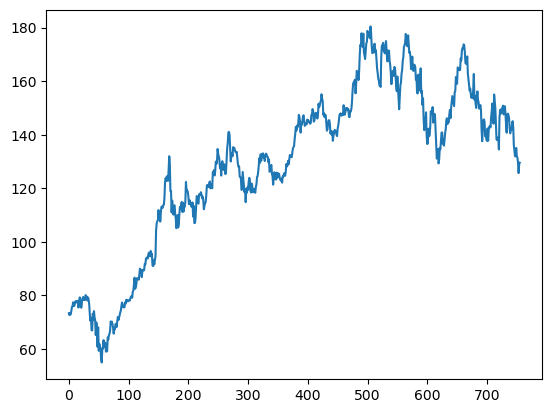

In [41]:
df["Adj Close"].plot()

In [42]:
df_stock_price = df.drop(columns=["Open", "High", "Low", "Close", "Volume"])

In [43]:
df_stock_price["Date"] = pd.to_datetime(df["Date"])

In [44]:
df_stock_price

,Date,Adj Close
0,2020-01-02,73.347946
1,2020-01-03,72.634842
2,2020-01-06,73.213631
3,2020-01-07,72.869308
4,2020-01-08,74.041489
...,...,...
751,2022-12-23,131.477127
752,2022-12-27,129.652435
753,2022-12-28,125.674019
754,2022-12-29,129.233658


In [45]:
X = df["Date"].astype(np.int64).values.reshape(-1, 1)
y = df["Adj Close"].values

/Users/nickgracan/anaconda3/envs/nicksdev/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """Entry point for launching an IPython kernel.


In [46]:
model = LinearRegression()

In [47]:
model.fit(X, y)

LinearRegression()

In [48]:
future_dates = pd.date_range(start="2023-01-01", periods=36, freq="M")
future_dates = future_dates.to_series().astype(np.int64).values.reshape(-1, 1)
future_prices = model.predict(future_dates)

/Users/nickgracan/anaconda3/envs/nicksdev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [49]:
future_data = pd.DataFrame({'Date': pd.to_datetime(future_dates.ravel()), 'Predicted_Close': future_prices})

<AxesSubplot:>

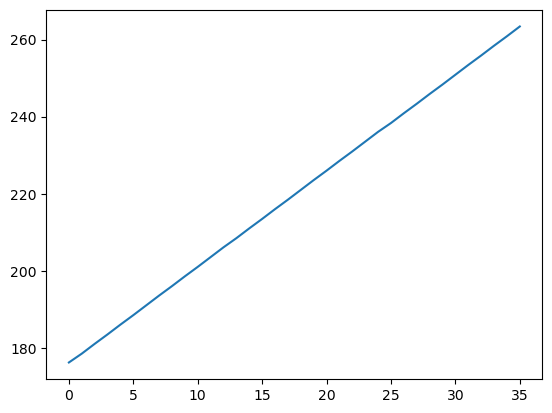

In [50]:
future_data["Predicted_Close"].plot()

In [51]:
print(future_data)

         Date  Predicted_Close
0  2023-01-31       176.222395
1  2023-02-28       178.514244
2  2023-03-31       181.051648
3  2023-04-30       183.507201
4  2023-05-31       186.044605
5  2023-06-30       188.500158
6  2023-07-31       191.037562
7  2023-08-31       193.574966
8  2023-09-30       196.030519
9  2023-10-31       198.567923
10 2023-11-30       201.023476
11 2023-12-31       203.560880
12 2024-01-31       206.098284
13 2024-02-29       208.471985
14 2024-03-31       211.009390
15 2024-04-30       213.464942
16 2024-05-31       216.002347
17 2024-06-30       218.457899
18 2024-07-31       220.995303
19 2024-08-31       223.532708
20 2024-09-30       225.988260
21 2024-10-31       228.525665
22 2024-11-30       230.981217
23 2024-12-31       233.518622
24 2025-01-31       236.056026
25 2025-02-28       238.347875
26 2025-03-31       240.885279
27 2025-04-30       243.340832
28 2025-05-31       245.878236
29 2025-06-30       248.333789
30 2025-07-31       250.871193
31 2025-